<a href="https://colab.research.google.com/github/Anmolvlog/UniCompiler/blob/main/Vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metrics

# New Section

In [ ]:
Default=pd.read_csv("/train_LZV4RXX.csv")

In [ ]:
Default.head(5)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [ ]:
Default.shape

(7000, 10)

In [ ]:
Default.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


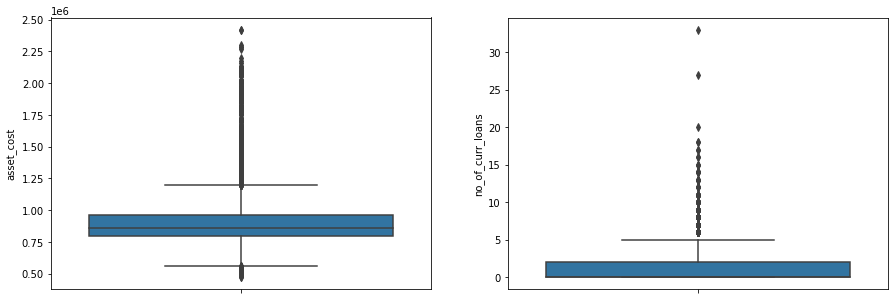

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default["asset_cost"])
plt.subplot(1,2,2)
sns.boxplot(y=Default["no_of_curr_loans"])
plt.show()


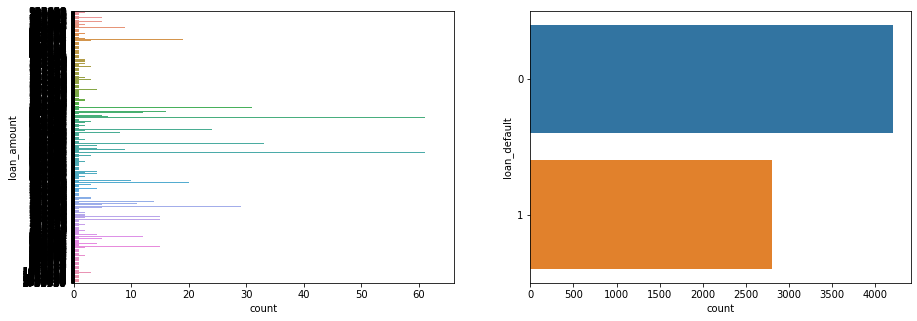

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=Default["loan_amount"])
plt.subplot(1,2,2)
sns.countplot(y=Default["loan_default"])
plt.show()


In [ ]:
Default["loan_amount"].value_counts()

699108    63
639636    62
675108    62
663108    61
615636    61
          ..
795228     1
778368     1
751776     1
266304     1
769656     1
Name: loan_amount, Length: 2655, dtype: int64

In [ ]:
Default["loan_default"].value_counts()

0    4200
1    2800
Name: loan_default, dtype: int64

In [ ]:
Default["loan_default"].value_counts(normalize=True)

0    0.6
1    0.4
Name: loan_default, dtype: float64

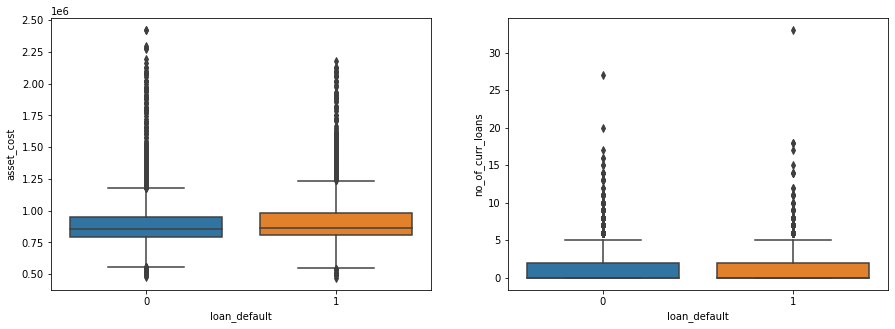

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default["loan_default"],Default["asset_cost"])
plt.subplot(1,2,2)
sns.boxplot(Default["loan_default"],Default["no_of_curr_loans"])
plt.show()


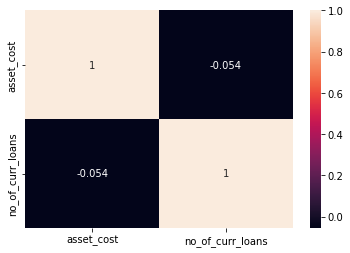

In [ ]:
sns.heatmap(Default[["asset_cost","no_of_curr_loans"]].corr(),annot=True)

In [ ]:
Default.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [ ]:
d1=Default.dropna()

In [ ]:
d1.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [ ]:
Q1,Q3=d1["asset_cost"].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [ ]:
UL

1194294.0

In [ ]:
df1=d1[d1["asset_cost"]>UL]

In [ ]:
df1

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0
27,28,33,1.0,Aadhar,904212,1317648,2,0,0,0
31,32,26,1.0,Aadhar,873780,1264860,0,0,0,0
34,35,27,2.0,Aadhar,588036,1262640,0,0,0,0
35,36,28,1.0,Aadhar,739764,1236000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6971,6972,31,1.0,Aadhar,968232,1237056,4,3,0,1
6977,6978,24,1.0,Aadhar,888612,1276596,2,0,0,0
6979,6980,29,1.0,Aadhar,883476,1194624,0,0,0,1
6984,6985,37,2.0,Driving,886212,1217628,0,0,0,1


In [ ]:
df1["loan_default"].count()

654

In [ ]:
df1["loan_default"].value_counts(normalize=True)

0    0.545872
1    0.454128
Name: loan_default, dtype: float64

In [ ]:
df1["loan_default"].value_counts()

0    357
1    297
Name: loan_default, dtype: int64

In [ ]:
d1["asset_cost"]=np.where(d1["asset_cost"]>UL,UL,d1["asset_cost"])

In [ ]:
d1.head(10)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920.0,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444.0,6,2,0,0
2,3,30,2.0,VoterID,642936,826092.0,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924.0,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1194294.0,0,0,0,0
5,6,34,2.0,Aadhar,779784,902040.0,0,0,0,1
6,7,27,2.0,Aadhar,449268,847896.0,0,0,0,0
7,8,27,2.0,Aadhar,582036,905604.0,0,0,0,1
8,9,30,1.0,Aadhar,712956,866292.0,0,0,0,0
9,10,46,2.0,Aadhar,554988,761724.0,3,0,0,1


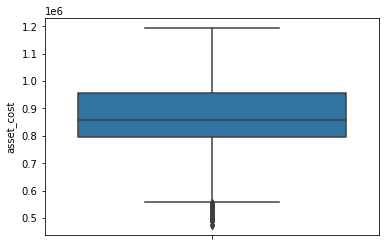

In [ ]:
sns.boxplot(y=d1["asset_cost"])
plt.show()

In [ ]:
d1=pd.get_dummies(d1,drop_first=True)

In [ ]:
d1.head(50)

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,1,27,1.0,504264,820920.0,2,2,0,0,0,0,0,0
1,2,48,1.0,728556,831444.0,6,2,0,0,0,0,0,0
2,3,30,2.0,642936,826092.0,0,0,0,1,0,0,0,1
3,4,28,1.0,746556,930924.0,0,0,0,0,0,0,0,0
4,5,29,1.0,1139880,1194294.0,0,0,0,0,0,0,0,0
5,6,34,2.0,779784,902040.0,0,0,0,1,0,0,0,0
6,7,27,2.0,449268,847896.0,0,0,0,0,0,0,0,0
7,8,27,2.0,582036,905604.0,0,0,0,1,0,0,0,0
8,9,30,1.0,712956,866292.0,0,0,0,0,0,0,0,0
9,10,46,2.0,554988,761724.0,3,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=d1.drop("loan_default",axis=1).astype("int")
y=d1["loan_default"].astype("int")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5066, 12)
(1689, 12)


In [ ]:
print(y_train)
print("")
print(y_test)

4002    1
3571    0
236     0
1709    0
4198    1
       ..
2964    0
1614    0
3318    1
6312    1
4666    0
Name: loan_default, Length: 5066, dtype: int64

783     1
2526    0
172     0
1453    0
2175    1
       ..
6741    0
1968    1
4921    0
6261    0
1122    0
Name: loan_default, Length: 1689, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=33,sampling_strategy=0.75)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_res,y_res)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[998,  25],
       [649,  17]])

In [ ]:
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.61      0.98      0.75      1023
           1       0.40      0.03      0.05       666

    accuracy                           0.60      1689
   macro avg       0.51      0.50      0.40      1689
weighted avg       0.53      0.60      0.47      1689



# New Section